In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd1aafb27-3d3d-4249-891c-a173733321b4',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-03T04:09:22.104Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9654}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9659, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df=pd.json_normalize(data['data'])

df['timestamp']=pd.to_datetime('now')

In [4]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9659,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.911084e+07,1.911084e+07,NaN,1,NaN,NaN,None,2022-08-03T04:07:00.000Z,22860.198223,2.790986e+10,3.0797,0.200940,-0.091330,8.445091,19.678113,-22.846515,-42.450119,4.368775e+11,41.2187,4.800642e+11,None,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:52.291707
1,1027,Ethereum,ETH,ethereum,5892,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.218072e+08,1.218072e+08,NaN,2,NaN,NaN,None,2022-08-03T04:07:00.000Z,1618.203053,1.990156e+10,12.0243,0.390558,2.359688,13.565480,53.625944,-8.030847,-44.982711,1.971087e+11,18.6007,1.971087e+11,None,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:52.291707
2,825,Tether,USDT,tether,37145,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.641263e+10,6.815898e+10,NaN,3,NaN,NaN,None,2022-08-03T04:07:00.000Z,1.000163,5.375090e+10,1.2613,0.001406,-0.008493,0.014535,0.109044,0.104392,0.017579,6.642348e+10,6.2669,6.817012e+10,None,2022-08-03T04:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-03 04:09:52.291707
3,3408,USD Coin,USDC,usd-coin,5114,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.439696e+10,5.439696e+10,NaN,4,NaN,NaN,None,2022-08-03T04:07:00.000Z,0.999897,8.011507e+09,-7.3724,-0.013407,0.011935,0.001830,-0.012669,-0.041568,0.000703,5.439134e+10,5.1317,5.439134e+10,None,2022-08-03T04:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-03 04:09:52.291707
4,1839,BNB,BNB,bnb,1046,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-08-03T04:07:00.000Z,282.679293,1.796730e+09,32.5131,0.223123,2.278561,12.275720,31.009499,-4.787320,-29.896623,4.560670e+10,4.3038,5.653586e+10,None,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:52.291707
5,4687,Binance USD,BUSD,binance-usd,4334,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.790518e+10,1.790518e+10,NaN,6,NaN,NaN,None,2022-08-03T04:07:00.000Z,1.000002,6.439879e+09,-7.8737,-0.001295,-0.045732,-0.105030,-0.143337,-0.155936,-0.126574,1.790522e+10,1.6893,1.790522e+10,None,2022-08-03T04:07:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-03 04:09:52.291707
6,52,XRP,XRP,xrp,785,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-08-03T04:07:00.000Z,0.367703,1.119622e+09,-3.7310,0.570402,-0.984315,10.814216,15.705234,-5.440504,-43.608996,1.777589e+10,1.6771,3.677027e+10,None,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:52.291707
7,2010,Cardano,ADA,cardano,532,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.451285e+10,NaN,8,NaN,NaN,None,2022-08-03T04:07:00.000Z,0.500357,6.652027e+08,-2.0005,0.650403,1.501586,8.660430,12.136055,-10.228525,-43.452268,1.688155e+10,1.5927,2.251605e+10,None,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:52.291707
8,5426,Solana,SOL,solana,355,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.466530e+08,5.116169e+08,NaN,9,NaN,NaN,None

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd1aafb27-3d3d-4249-891c-a173733321b4',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2=pd.json_normalize(data['data'])

    df2['timestamp']=pd.to_datetime('now')

    df=df2.append(df2)
    
    
    if not os.path.isfile(r'C:\Users\Asus\Data Projects\API.csv'):
        df.to_csv(r'C:\Users\Asus\Data Projects\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Asus\Data Projects\API.csv',mode='a',header=False)

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api runner completed')
    sleep(60)
exit()

Api runner completed
Api runner completed
Api runner completed
Api runner completed


KeyboardInterrupt: 

In [7]:
df=pd.read_csv(r'C:\Users\Asus\Data Projects\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9659,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.911084e+07,1.911084e+07,NaN,1,NaN,NaN,NaN,2022-08-03T04:07:00.000Z,22860.198223,2.790986e+10,3.0797,0.200940,-0.091330,8.445091,19.678113,-22.846515,-42.450119,4.368775e+11,41.2187,4.800642e+11,NaN,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
1,1,1027,Ethereum,ETH,ethereum,5892,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.218072e+08,1.218072e+08,NaN,2,NaN,NaN,NaN,2022-08-03T04:07:00.000Z,1618.203053,1.990156e+10,12.0243,0.390558,2.359688,13.565480,53.625944,-8.030847,-44.982711,1.971087e+11,18.6007,1.971087e+11,NaN,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
2,2,825,Tether,USDT,tether,37145,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.641263e+10,6.815898e+10,NaN,3,NaN,NaN,NaN,2022-08-03T04:07:00.000Z,1.000163,5.375090e+10,1.2613,0.001406,-0.008493,0.014535,0.109044,0.104392,0.017579,6.642348e+10,6.2669,6.817012e+10,NaN,2022-08-03T04:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-03 04:09:57.582100
3,3,3408,USD Coin,USDC,usd-coin,5114,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.439696e+10,5.439696e+10,NaN,4,NaN,NaN,NaN,2022-08-03T04:07:00.000Z,0.999897,8.011507e+09,-7.3724,-0.013407,0.011935,0.001830,-0.012669,-0.041568,0.000703,5.439134e+10,5.1317,5.439134e+10,NaN,2022-08-03T04:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-03 04:09:57.582100
4,4,1839,BNB,BNB,bnb,1046,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-08-03T04:07:00.000Z,282.679293,1.796730e+09,32.5131,0.223123,2.278561,12.275720,31.009499,-4.787320,-29.896623,4.560670e+10,4.3038,5.653586e+10,NaN,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
5,5,4687,Binance USD,BUSD,binance-usd,4334,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.790518e+10,1.790518e+10,NaN,6,NaN,NaN,NaN,2022-08-03T04:07:00.000Z,1.000002,6.439879e+09,-7.8737,-0.001295,-0.045732,-0.105030,-0.143337,-0.155936,-0.126574,1.790522e+10,1.6893,1.790522e+10,NaN,2022-08-03T04:07:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-03 04:09:57.582100
6,6,52,XRP,XRP,xrp,785,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,NaN,2022-08-03T04:07:00.000Z,0.367703,1.119622e+09,-3.7310,0.570402,-0.984315,10.814216,15.705234,-5.440504,-43.608996,1.777589e+10,1.6771,3.677027e+10,NaN,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
7,7,2010,Cardano,ADA,cardano,532,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",4.500000e+10,3.373903e+10,3.451285e+10,NaN,8,NaN,NaN,NaN,2022-08-03T04:07:00.000Z,0.500357,6.652027e+08,-2.0005,0.650403,1.501586,8.660430,12.136055,-10.228525,-43.452268,1.688155e+10,1.5927,2.251605e+10,NaN,2022-08-03T04:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
8,8,5426,Solana,SOL,solana,355,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.466530e+08,5.116169e+08,NaN,9

In [8]:
pd.set_option('display.float_format',lambda x:'%.5f'%x)

In [9]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9659,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19110837.00000,19110837.00000,nan,1,nan,nan,nan,2022-08-03T04:07:00.000Z,22860.19822,27909864560.91236,3.07970,0.20094,-0.09133,8.44509,19.67811,-22.84652,-42.45012,436877522022.40997,41.21870,480064162677.46997,nan,2022-08-03T04:07:00.000Z,nan,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
1,1,1027,Ethereum,ETH,ethereum,5892,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",nan,121807163.81150,121807163.81150,nan,2,nan,nan,nan,2022-08-03T04:07:00.000Z,1618.20305,19901563367.68786,12.02430,0.39056,2.35969,13.56548,53.62594,-8.03085,-44.98271,197108724400.59720,18.60070,197108724400.60001,nan,2022-08-03T04:07:00.000Z,nan,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
2,2,825,Tether,USDT,tether,37145,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",nan,66412627906.20763,68158976389.63393,nan,3,nan,nan,nan,2022-08-03T04:07:00.000Z,1.00016,53750898378.18390,1.26130,0.00141,-0.00849,0.01454,0.10904,0.10439,0.01758,66423483191.20020,6.26690,68170117118.99000,nan,2022-08-03T04:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-03 04:09:57.582100
3,3,3408,USD Coin,USDC,usd-coin,5114,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",nan,54396963131.92972,54396963131.92972,nan,4,nan,nan,nan,2022-08-03T04:07:00.000Z,0.99990,8011506505.91679,-7.37240,-0.01341,0.01194,0.00183,-0.01267,-0.04157,0.00070,54391337447.14883,5.13170,54391337447.15000,nan,2022-08-03T04:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-03 04:09:57.582100
4,4,1839,BNB,BNB,bnb,1046,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,nan,5,nan,nan,nan,2022-08-03T04:07:00.000Z,282.67929,1796730300.40382,32.51310,0.22312,2.27856,12.27572,31.00950,-4.78732,-29.89662,45606702975.90368,4.30380,56535858694.74000,nan,2022-08-03T04:07:00.000Z,nan,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
5,5,4687,Binance USD,BUSD,binance-usd,4334,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",nan,17905176112.64925,17905176112.64925,nan,6,nan,nan,nan,2022-08-03T04:07:00.000Z,1.00000,6439879475.02936,-7.87370,-0.00130,-0.04573,-0.10503,-0.14334,-0.15594,-0.12657,17905220328.43927,1.68930,17905220328.44000,nan,2022-08-03T04:07:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-08-03 04:09:57.582100
6,6,52,XRP,XRP,xrp,785,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,48343101197.00000,99989535142.00000,nan,7,nan,nan,nan,2022-08-03T04:07:00.000Z,0.36770,1119621591.10846,-3.73100,0.57040,-0.98432,10.81422,15.70523,-5.44050,-43.60900,17775887561.68791,1.67710,36770267362.97000,nan,2022-08-03T04:07:00.000Z,nan,NaN,NaN,NaN,NaN,2022-08-03 04:09:57.582100
7,7,2010,Cardano,ADA,cardano,532,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33739028515.75500,34512850428.99300,nan,8,nan,nan,nan,2022-08-03T04:07:00.000Z,0.50036,665202661.06232,-2.00050,0.65040,1.50159,8.66043,12.13606,-10.22853,-43.45227,16881548375.41550,1.59270,22516050707.83000,nan,2022-08-03T04:07:00.000Z,nan,NaN,NaN,NaN,Na

In [10]:
df4=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.20572,-0.09719,8.45887,19.72413,-22.86382,-42.43124
Ethereum,0.41660,2.33000,13.60643,53.70225,-8.06027,-44.95318
Tether,0.00230,-0.00856,0.01438,0.10867,0.10439,0.01736
USD Coin,-0.00653,0.01286,0.00396,-0.00376,-0.02577,0.01195
BNB,0.22738,2.26093,12.28742,31.08879,-4.80306,-29.85980
Binance USD,-0.00903,-0.00942,-0.11168,-0.09586,-0.11394,-0.10780
XRP,0.55553,-0.98327,10.81962,15.72827,-5.44172,-43.61295
Cardano,0.64441,1.49975,8.67055,12.17414,-10.29982,-43.42147
Solana,-0.89982,-4.66380,7.07429,17.58704,4.44472,-59.31996


In [11]:
df5=df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h      0.20572
             quote.USD.percent_change_24h    -0.09719
             quote.USD.percent_change_7d      8.45887
             quote.USD.percent_change_30d    19.72413
             quote.USD.percent_change_60d   -22.86382
             quote.USD.percent_change_90d   -42.43124
Ethereum     quote.USD.percent_change_1h      0.41660
             quote.USD.percent_change_24h     2.33000
             quote.USD.percent_change_7d     13.60643
             quote.USD.percent_change_30d    53.70225
             quote.USD.percent_change_60d    -8.06027
             quote.USD.percent_change_90d   -44.95318
Tether       quote.USD.percent_change_1h      0.00230
             quote.USD.percent_change_24h    -0.00856
             quote.USD.percent_change_7d      0.01438
             quote.USD.percent_change_30d     0.10867
             quote.USD.percent_change_60d     0.10439
             quote.USD.percent_change_90

In [12]:
df6=df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.20572
            quote.USD.percent_change_24h  -0.09719
            quote.USD.percent_change_7d    8.45887
            quote.USD.percent_change_30d  19.72413
            quote.USD.percent_change_60d -22.86382
            quote.USD.percent_change_90d -42.43124
Ethereum    quote.USD.percent_change_1h    0.41660
            quote.USD.percent_change_24h   2.33000
            quote.USD.percent_change_7d   13.60643
            quote.USD.percent_change_30d  53.70225
            quote.USD.percent_change_60d  -8.06027
            quote.USD.percent_change_90d -44.95318
Tether      quote.USD.percent_change_1h    0.00230
            quote.USD.percent_change_24h  -0.00856
            quote.USD.percent_change_7d    0.01438
            quote.USD.percent_change_30d   0.10867
            quote.USD.percent_change_60d   0.10439
            quote.USD.percent_change_90d   0.01736
USD Coin    quote.USD.percent_change_1h   -0.00653
            quote.USD.percent_change_24h   0.01286
            quote.USD.percent_change_7d    0.00396
            quote.USD.percent_change_30d  -0.00376
            quote.USD.percent_change_60d  -0.02577
            quote.USD.percent_change_90d   0.01195
BNB         quote.USD.percent_change_1h    0.22738
            quote.USD.percent_change_24h   2.26093
            quote.USD.percent_change_7d   12.28742
            quote.USD.percent_change_30d  31.08879
            quote.USD.percent_change_60d  -4.80306
            quote.USD.percent_change_90d -29.85980
Binance USD quote.USD.percent_change_1h   -0.00903
            quote.USD.percent_change_24h  -0.00942
            quote.USD.percent_change_7d   -0.11168
            quote.USD.percent_change_30d  -0.09586
            quote.USD.percent_change_60d  -0.11394
            quote.USD.percent_change_90d  -0.10780
XRP         quote.USD.percent_change_1h    0.55553
            quote.USD.percent_change_24h  -0.98327
            quote.USD.percent_change_7d   10.81962
            quote.USD.percent_change_30d  15.72827
            quote.USD.percent_change_60d  -5.44172
            quote.USD.percent_change_90d -43.61295
Cardano     quote.USD.percent_change_1h    0.64441
            quote.USD.percent_change_24h   1.49975
            quote.USD.percent_change_7d    8.67055
            quote.USD.percent_change_30d  12.17414
            quote.USD.percent_change_60d -10.29982
            quote.USD.percent_change_90d -43.42147
Solana      quote.USD.percent_change_1h   -0.89982
            quote.USD.percent_change_24h  -4.66380
            quote.USD.percent_change_7d    7.07429
            quote.USD.percent_change_30d  17.58704
            quote.USD.percent_change_60d   4.44472
            quote.USD.percent_change_90d -59.31996
Dogecoin    quote.USD.percent_change_1h    0.60732
            quote.USD.percent_change_24h   0.50184
            quote.USD.percent_change_7d    7.38701
            quote.USD.percent_change_30d   0.08654
            quote.USD.percent_change_60d -17.31752
            quote.USD.percent_change_90d -51.34891
Polkadot    quote.USD.percent_change_1h    0.79653
            quote.USD.percent_change_24h   2.39847
            quote.USD.percent_change_7d   18.49848
            quote.USD.percent_change_30d  18.26653
            quote.USD.percent_change_60d -14.91796
            quote.USD.percent_change_90d -51.54649
Dai         quote.USD.percent_change_1h    0.03423
            quote.USD.percent_change_24h   0.06613
            quote.USD.percent_change_7d    0.05105
            quote.USD.percent_change_30d   0.03492
            quote.USD.percent_change_60d   0.01284
            quote.USD.percent_change_90d   0.01458
Polygon     quote.USD.percent_change_1h    1.31806
            quote.USD.percent_change_24h   3.35050
            quote.USD.percent_change_7d   15.44665
            quote.USD.percent_change_30d  95.39749
            quote.USD.percent_change_60d  50.89437
            quo

In [13]:
df6.count()

values    90
dtype: int64

In [14]:
index=pd.Index(range(90))

df7= df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.20572
1,Bitcoin,quote.USD.percent_change_24h,-0.09719
2,Bitcoin,quote.USD.percent_change_7d,8.45887
3,Bitcoin,quote.USD.percent_change_30d,19.72413
4,Bitcoin,quote.USD.percent_change_60d,-22.86382
5,Bitcoin,quote.USD.percent_change_90d,-42.43124
6,Ethereum,quote.USD.percent_change_1h,0.41660
7,Ethereum,quote.USD.percent_change_24h,2.33000
8,Ethereum,quote.USD.percent_change_7d,13.60643
9,Ethereum,quote.USD.percent_change_30d,53.70225


In [15]:
df8=df7.rename(columns={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.20572
1,Bitcoin,quote.USD.percent_change_24h,-0.09719
2,Bitcoin,quote.USD.percent_change_7d,8.45887
3,Bitcoin,quote.USD.percent_change_30d,19.72413
4,Bitcoin,quote.USD.percent_change_60d,-22.86382
5,Bitcoin,quote.USD.percent_change_90d,-42.43124
6,Ethereum,quote.USD.percent_change_1h,0.41660
7,Ethereum,quote.USD.percent_change_24h,2.33000
8,Ethereum,quote.USD.percent_change_7d,13.60643
9,Ethereum,quote.USD.percent_change_30d,53.70225


In [16]:
df8['percent_change']=df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.20572
1,Bitcoin,24h,-0.09719
2,Bitcoin,7d,8.45887
3,Bitcoin,30d,19.72413
4,Bitcoin,60d,-22.86382
5,Bitcoin,90d,-42.43124
6,Ethereum,1h,0.41660
7,Ethereum,24h,2.33000
8,Ethereum,7d,13.60643
9,Ethereum,30d,53.70225


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

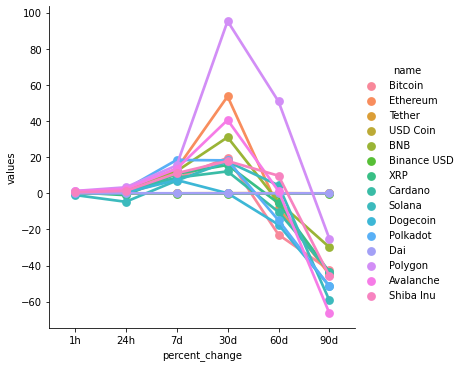

In [18]:
sns.catplot(x='percent_change',y='values',hue='name',data=df8,kind='point')

In [19]:
df9=df[['name','quote.USD.price','timestamp']]
df9=df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,22860.19822,2022-08-03 04:09:57.582100
15,Bitcoin,22860.19822,2022-08-03 04:09:57.582100
30,Bitcoin,22864.72815,2022-08-03 04:10:58.270644
45,Bitcoin,22864.72815,2022-08-03 04:10:58.270644
60,Bitcoin,22864.72815,2022-08-03 04:11:59.629517
75,Bitcoin,22864.72815,2022-08-03 04:11:59.629517
90,Bitcoin,22866.56392,2022-08-03 04:13:01.098685
105,Bitcoin,22866.56392,2022-08-03 04:13:01.098685


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

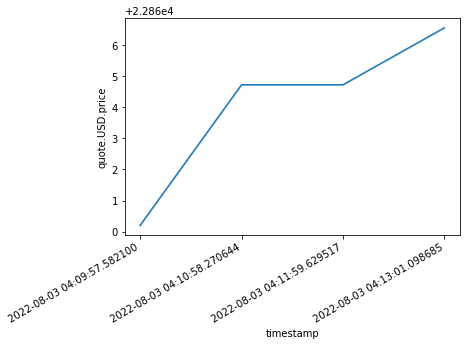

In [26]:
sns.lineplot(x='timestamp',y='quote.USD.price',data=df9)
plt.xticks(
    rotation=30, 
    horizontalalignment='right',
    fontweight='light',  
)